# Game Theory Simulation

Computational analysis of strategic interactions and Nash equilibria in game theory models. Studies evolutionary dynamics and optimal strategies in competitive scenarios.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [3]:
sqrt_n = 10
n = int(sqrt_n ** 2)
beta = 0.1

payoff = np.array([[2, 10], [0, 8]])

gain = np.zeros((sqrt_n, sqrt_n))
grid = np.array(np.random.choice(2, (sqrt_n, sqrt_n)))
grid

array([[0, 1, 0, 1, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 1, 0, 1, 0],
       [1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 1, 1, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 1, 0, 1, 1, 0],
       [1, 1, 1, 0, 0, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 0, 1, 0, 1]])

In [4]:
def neighbors(grid, where):
    i, j = where
    #periodic boundary conditions is satisfied
    return grid[i-1, j], grid[i, j-1], grid[(i+1)%sqrt_n, j], grid[i, (j+1)%sqrt_n]

def nei_gain(i, j):
    return gain[i-1, j], gain[i, j-1], gain[i+1, j], gain[i, j+1]

def make_decision(grid, next_grid, i, j):
    #chose a person to compare
    ic, jc = np.random.choice(2, 2)
    compare = gain[ic, jc]
    state   = grid[ic, jc]
    if gain[i, j] <= compare:
        next_grid[i, j] = state
    else:
        if random.random() < np.exp(- beta * (gain[i, j] - compare)):
            next_grid[i, j] = state
    return next_grid
    

Text(0, 0.5, 'q')

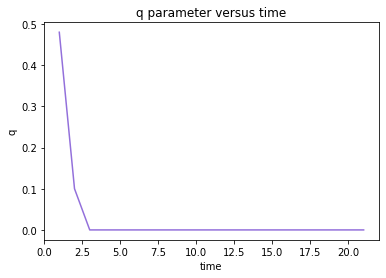

In [5]:
%%time

sqrt_n = 10
n = int(sqrt_n ** 2)
beta = 1

payoff = np.array([[2, 10], [0, 8]])

#initial conditions
gain = np.zeros((sqrt_n, sqrt_n))
grid = np.random.choice(2, (sqrt_n, sqrt_n))

up_to = 20
q = []
#initial value
q.append(np.sum(grid))

for time in range(up_to):
    
    where1 = zip(np.where(grid == 1)[0], np.where(grid == 1)[1])
    where0 = zip(np.where(grid == 0)[0], np.where(grid == 0)[1])

    for where in where1:
        gain[where] = 0
        for state in neighbors(grid, where):
            if state == 1:
                gain[where] += payoff[1, 1]
            else:
                gain[where] += payoff[1, 0]

    for where in where0:
        gain[where] = 0
        for state in neighbors(grid, where):
            if state == 1:
                gain[where] += payoff[0, 1]
            else:
                gain[where] += payoff[0, 0]
    next_grid = grid
    for i in range(sqrt_n):
        for j in range(sqrt_n):
            next_grid = make_decision(grid, next_grid, i, j)
    grid = next_grid
    q.append(np.sum(grid))
    
q = np.array(q)    

plt.plot(np.arange(up_to + 1) + 1 , q/100, c = 'mediumpurple')
plt.title("q parameter versus time")
plt.xlabel("time")
plt.ylabel("q")

# plt.savefig("q.png")


Looking for the equilibrium value of q for different $\beta$ values: 

Wall time: 8min 8s


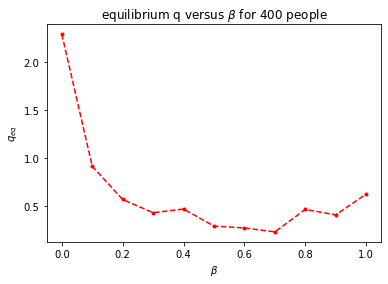

In [19]:
%%time

sqrt_n     = 20
n = int(sqrt_n ** 2)
up_to      = 20
average_on = 70
beta_range = np.arange(0, 1.1, 0.1)
payoff     = np.array([[2, 10], [0, 8]])
final_q = []



for beta in beta_range:
    av_q = []
    for m in range(average_on):
        
        #initial conditions
        gain = np.zeros((sqrt_n, sqrt_n))
        grid = np.random.choice(2, (sqrt_n, sqrt_n))

        q = []
        #initial value
        q.append(np.sum(grid))

        for time in range(up_to):

            where1 = zip(np.where(grid == 1)[0], np.where(grid == 1)[1])
            where0 = zip(np.where(grid == 0)[0], np.where(grid == 0)[1])

            for where in where1:
                gain[where] = 0
                for state in neighbors(grid, where):
                    if state == 1:
                        gain[where] += payoff[1, 1]
                    else:
                        gain[where] += payoff[1, 0]

            for where in where0:
                gain[where] = 0
                for state in neighbors(grid, where):
                    if state == 1:
                        gain[where] += payoff[0, 1]
                    else:
                        gain[where] += payoff[0, 0]
            next_grid = grid
            for i in range(sqrt_n):
                for j in range(sqrt_n):
                    next_grid = make_decision(grid, next_grid, i, j)
            grid = next_grid
            q.append(np.sum(grid))

        av_q.append(q[up_to-1])
    final_q.append(np.mean(av_q))
        

# plt.plot(np.arange(up_to + 1) + 1 , q/100, marker = '.', linestyle = '--', label = '')
final_q    = np.array(final_q)

plt.plot(beta_range, final_q/n, marker = '.', linestyle = '--', c = 'red')
plt.title(f"equilibrium q versus $\u03B2$ for {n} people\n averaged on {average_on} samples")
plt.xlabel("$\u03B2$")
plt.ylabel("$q_{eq}$")

plt.ylim = (0, 1)
plt.savefig(f"qeq{n}.png")

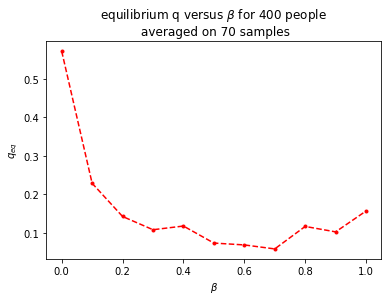

In [23]:
plt.plot(beta_range, final_q/n, marker = '.', linestyle = '--', c = 'red')
plt.title(f"equilibrium q versus $\u03B2$ for {n} people\n averaged on {average_on} samples")
plt.xlabel("$\u03B2$")
plt.ylabel("$q_{eq}$")

plt.ylim = [0, 1]

plt.savefig(f"qeq{n}.png")

Wall time: 2min 11s


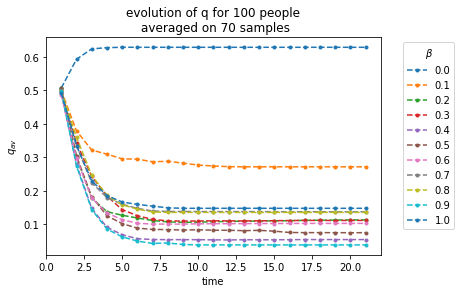

In [44]:
%%time

sqrt_n     = 10
n = int(sqrt_n ** 2)
up_to      = 20
average_on = 70
beta_range = np.arange(0, 1.1, 0.1)
payoff     = np.array([[2, 10], [0, 8]])
final_q = []



for beta in beta_range:
    av_q = []
    all_q = []
    for m in range(average_on):
        
        #initial conditions
        gain = np.zeros((sqrt_n, sqrt_n))
        grid = np.random.choice(2, (sqrt_n, sqrt_n))

        q = []
        #initial value
        q.append(np.sum(grid))

        for time in range(up_to):

            where1 = zip(np.where(grid == 1)[0], np.where(grid == 1)[1])
            where0 = zip(np.where(grid == 0)[0], np.where(grid == 0)[1])

            for where in where1:
                gain[where] = 0
                for state in neighbors(grid, where):
                    if state == 1:
                        gain[where] += payoff[1, 1]
                    else:
                        gain[where] += payoff[1, 0]

            for where in where0:
                gain[where] = 0
                for state in neighbors(grid, where):
                    if state == 1:
                        gain[where] += payoff[0, 1]
                    else:
                        gain[where] += payoff[0, 0]
            next_grid = grid
            for i in range(sqrt_n):
                for j in range(sqrt_n):
                    next_grid = make_decision(grid, next_grid, i, j)
            grid = next_grid
            q.append(np.sum(grid))
        all_q.append(q)
    all_q = np.array(all_q)
    all_q.reshape((average_on, up_to + 1))
    ave_q = all_q.mean(axis = 0)
    ave_q = np.array(ave_q)
    plt.plot(np.arange(up_to + 1) + 1 , ave_q/n, marker = '.', linestyle = '--', label = f'{np.round(beta, 2)}')

# final_q    = np.array(final_q)

# plt.plot(beta_range, final_q/n, marker = '.', linestyle = '--', c = 'red')
plt.title(f"evolution of q for {n} people\n averaged on {average_on} samples")
plt.xlabel("time")
plt.ylabel("$q_{av}$")
plt.legend(title='$\u03B2$', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim = (0, 1)
plt.savefig(f"evolution.png")

### Change in payoff matrix

Wall time: 2min 9s


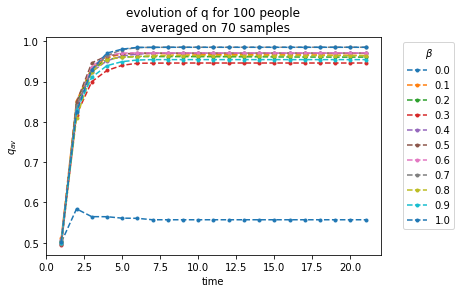

In [46]:
%%time

sqrt_n     = 10
n = int(sqrt_n ** 2)
up_to      = 20
average_on = 70
beta_range = np.arange(0, 1.1, 0.1)
payoff     = np.array([[0, 2], [8, 10]])
final_q = []



for beta in beta_range:
    av_q = []
    all_q = []
    for m in range(average_on):
        
        #initial conditions
        gain = np.zeros((sqrt_n, sqrt_n))
        grid = np.random.choice(2, (sqrt_n, sqrt_n))

        q = []
        #initial value
        q.append(np.sum(grid))

        for time in range(up_to):

            where1 = zip(np.where(grid == 1)[0], np.where(grid == 1)[1])
            where0 = zip(np.where(grid == 0)[0], np.where(grid == 0)[1])

            for where in where1:
                gain[where] = 0
                for state in neighbors(grid, where):
                    if state == 1:
                        gain[where] += payoff[1, 1]
                    else:
                        gain[where] += payoff[1, 0]

            for where in where0:
                gain[where] = 0
                for state in neighbors(grid, where):
                    if state == 1:
                        gain[where] += payoff[0, 1]
                    else:
                        gain[where] += payoff[0, 0]
            next_grid = grid
            for i in range(sqrt_n):
                for j in range(sqrt_n):
                    next_grid = make_decision(grid, next_grid, i, j)
            grid = next_grid
            q.append(np.sum(grid))
        all_q.append(q)
    all_q = np.array(all_q)
    all_q.reshape((average_on, up_to + 1))
    ave_q = all_q.mean(axis = 0)
    ave_q = np.array(ave_q)
    plt.plot(np.arange(up_to + 1) + 1 , ave_q/n, marker = '.', linestyle = '--', label = f'{np.round(beta, 2)}')




plt.title(f"evolution of q for {n} people\n averaged on {average_on} samples")
plt.xlabel("time")
plt.ylabel("$q_{av}$")
plt.legend(title='$\u03B2$', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim = (0, 1)
plt.savefig(f"evolution3.png")

## Include mutation

In [47]:
def make_decision_mutation(grid, next_grid, i, j):
    #mutation occurs with probability p
    if random.random() <= p:
        next_grid[i, j] = (grid[i, j] + 1)%2 #change it to oposite
    else:
        #chose a person to compare
        ic, jc = np.random.choice(2, 2)
        compare = gain[ic, jc]
        state   = grid[ic, jc]
        if gain[i, j] <= compare:
            next_grid[i, j] = state
        else:
            if random.random() < np.exp(- beta * (gain[i, j] - compare)):
                next_grid[i, j] = state
    return next_grid

Wall time: 2min 14s


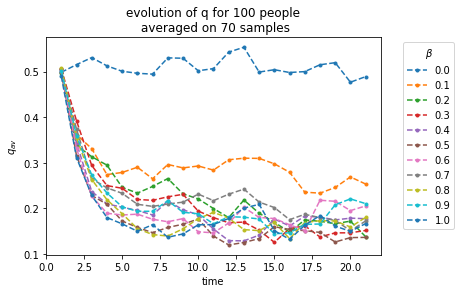

In [48]:
%%time

p = 0.05

sqrt_n     = 10
n = int(sqrt_n ** 2)
up_to      = 20
average_on = 70
beta_range = np.arange(0, 1.1, 0.1)
payoff = np.array([[2, 10], [0, 8]])
final_q = []



for beta in beta_range:
    av_q = []
    all_q = []
    for m in range(average_on):
        
        #initial conditions
        gain = np.zeros((sqrt_n, sqrt_n))
        grid = np.random.choice(2, (sqrt_n, sqrt_n))

        q = []
        #initial value
        q.append(np.sum(grid))

        for time in range(up_to):

            where1 = zip(np.where(grid == 1)[0], np.where(grid == 1)[1])
            where0 = zip(np.where(grid == 0)[0], np.where(grid == 0)[1])

            for where in where1:
                gain[where] = 0
                for state in neighbors(grid, where):
                    if state == 1:
                        gain[where] += payoff[1, 1]
                    else:
                        gain[where] += payoff[1, 0]

            for where in where0:
                gain[where] = 0
                for state in neighbors(grid, where):
                    if state == 1:
                        gain[where] += payoff[0, 1]
                    else:
                        gain[where] += payoff[0, 0]
            next_grid = grid
            for i in range(sqrt_n):
                for j in range(sqrt_n):
                    next_grid = make_decision_mutation(grid, next_grid, i, j)
            grid = next_grid
            q.append(np.sum(grid))
        all_q.append(q)
    all_q = np.array(all_q)
    all_q.reshape((average_on, up_to + 1))
    ave_q = all_q.mean(axis = 0)
    ave_q = np.array(ave_q)
    plt.plot(np.arange(up_to + 1) + 1 , ave_q/n, marker = '.', linestyle = '--', label = f'{np.round(beta, 2)}')


plt.title(f"evolution of q for {n} people\n averaged on {average_on} samples")
plt.xlabel("time")
plt.ylabel("$q_{av}$")
plt.legend(title='$\u03B2$', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim = (0, 1)
plt.savefig("evol_mut.png")

Wall time: 2min 7s


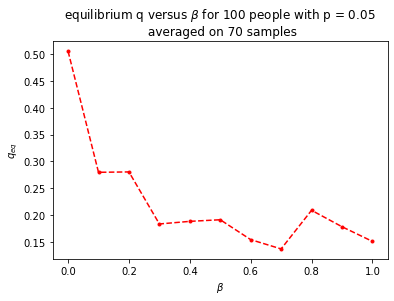

In [50]:
%%time

p = 0.05
sqrt_n     = 10
n = int(sqrt_n ** 2)
up_to      = 20
average_on = 70
beta_range = np.arange(0, 1.1, 0.1)
payoff     = np.array([[2, 10], [0, 8]])
final_q = []



for beta in beta_range:
    av_q = []
    for m in range(average_on):
        
        #initial conditions
        gain = np.zeros((sqrt_n, sqrt_n))
        grid = np.random.choice(2, (sqrt_n, sqrt_n))

        q = []
        #initial value
        q.append(np.sum(grid))

        for time in range(up_to):

            where1 = zip(np.where(grid == 1)[0], np.where(grid == 1)[1])
            where0 = zip(np.where(grid == 0)[0], np.where(grid == 0)[1])

            for where in where1:
                gain[where] = 0
                for state in neighbors(grid, where):
                    if state == 1:
                        gain[where] += payoff[1, 1]
                    else:
                        gain[where] += payoff[1, 0]

            for where in where0:
                gain[where] = 0
                for state in neighbors(grid, where):
                    if state == 1:
                        gain[where] += payoff[0, 1]
                    else:
                        gain[where] += payoff[0, 0]
            next_grid = grid
            for i in range(sqrt_n):
                for j in range(sqrt_n):
                    next_grid = make_decision_mutation(grid, next_grid, i, j)
            grid = next_grid
            q.append(np.sum(grid))

        av_q.append(q[up_to-1])
    final_q.append(np.mean(av_q))
        

final_q    = np.array(final_q)

plt.plot(beta_range, final_q/n, marker = '.', linestyle = '--', c = 'red')
plt.title(f"equilibrium q versus $\u03B2$ for {n} people with p = {p}\n averaged on {average_on} samples")
plt.xlabel("$\u03B2$")
plt.ylabel("$q_{eq}$")

plt.ylim = (0, 1)
plt.savefig(f"qeq{n}_mut.png")

## Lock uncollabrators suddenly